In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df_ev_sales = pd.read_csv('/content/IEA Global EV Data 2024 new.csv')

# Display the columns and first few rows of the dataset
print("Columns in the dataset:")
print(df_ev_sales.columns)
print("\nFirst few rows of the dataset:")
print(df_ev_sales.head())

Columns in the dataset:
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value', 'percentage'],
      dtype='object')

First few rows of the dataset:
    region    category       parameter   mode powertrain  year      unit  \
0  Austria  Historical        EV stock   Cars        BEV  2010  Vehicles   
1  Austria  Historical  EV stock share   Cars         EV  2010   percent   
2  Belgium  Historical        EV stock  Buses        BEV  2010  Vehicles   
3  Belgium  Historical        EV sales   Vans        BEV  2010  Vehicles   
4  Belgium  Historical        EV stock   Vans        BEV  2010  Vehicles   

             value          percentage  
0              350           35000,00%  
1  789.999.961.853  78999996185300,00%  
2                3             300,00%  
3                7             700,00%  
4               62            6200,00%  


In [ ]:
# Check for missing values in the dataset
missing_values = df_ev_sales.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
percentage    0
dtype: int64


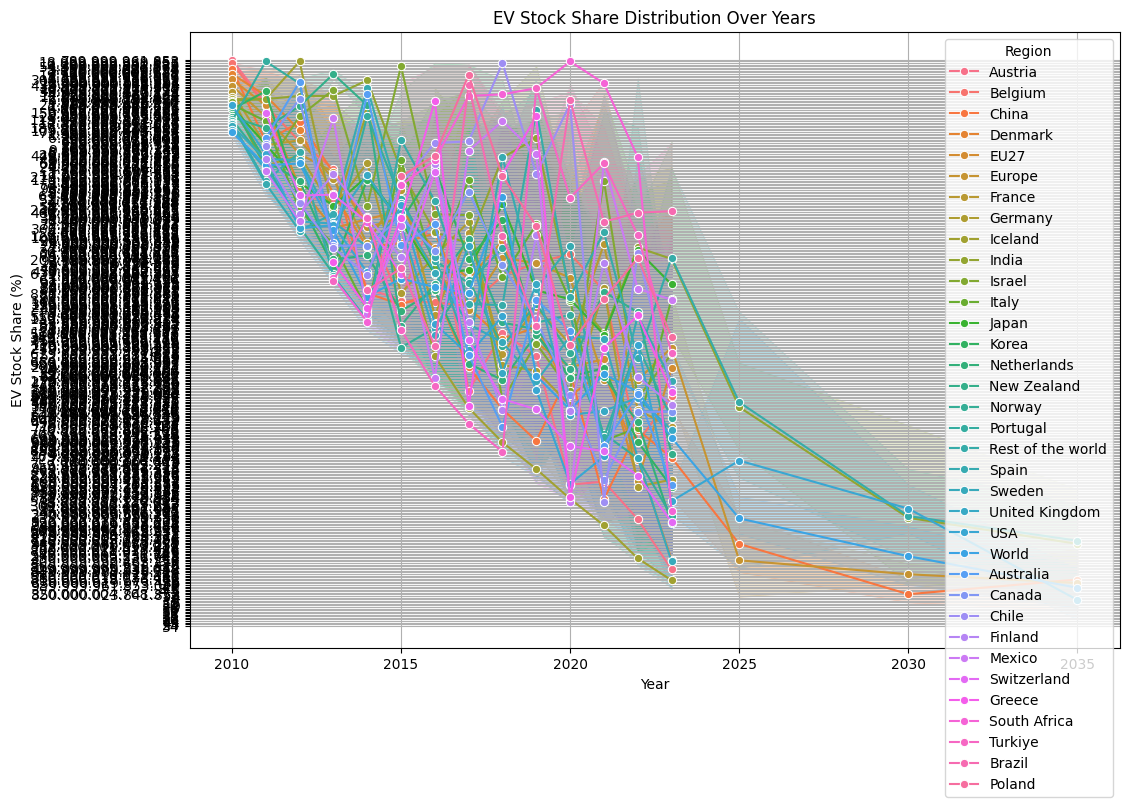

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot the distribution of EV stock share over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

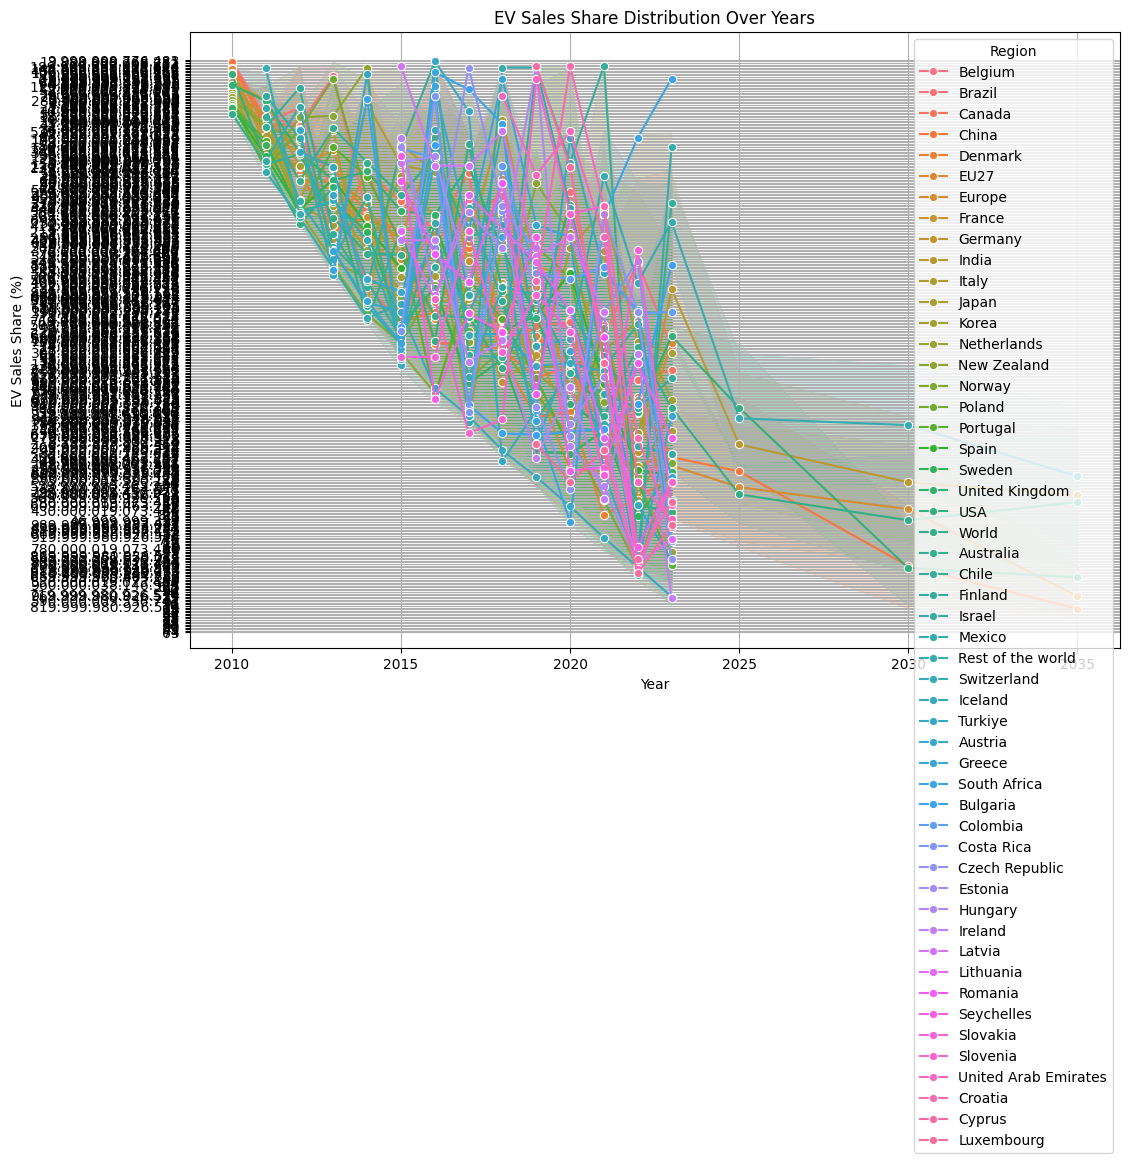

In [ ]:
# Filter data for EV sales share
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Plot the distribution of EV sales share over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Share Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

<ipython-input-9-4890e59ad056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales['value'] = pd.to_numeric(ev_sales['value'].str.replace('.', '', regex=False))


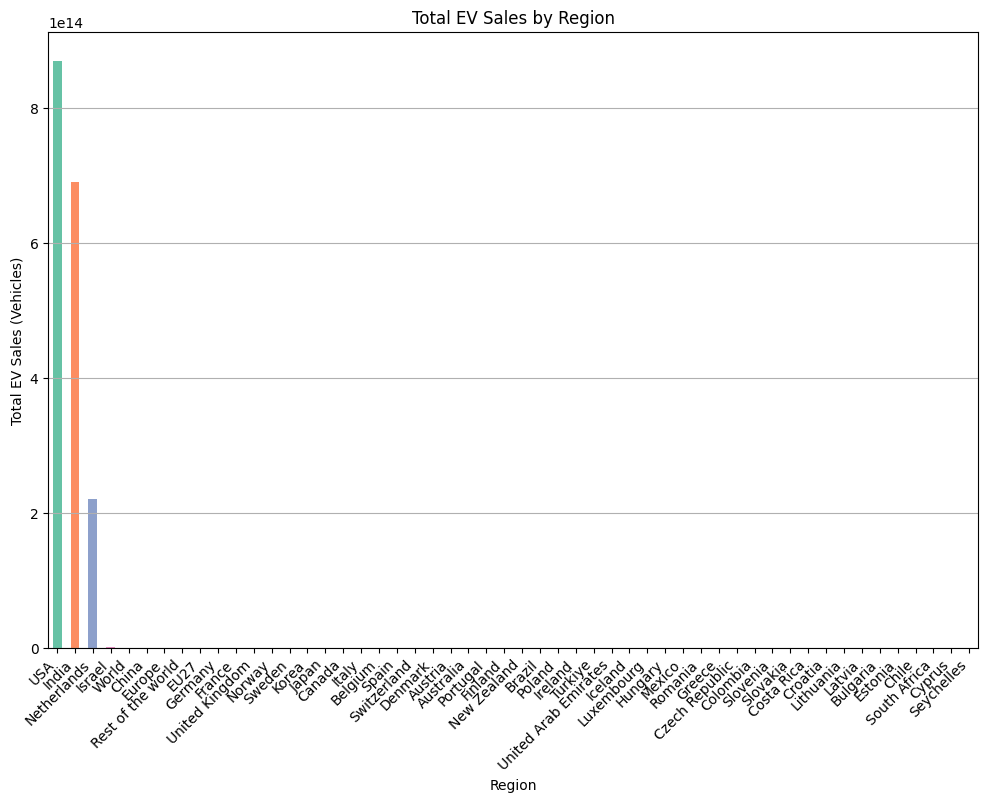

In [ ]:
# Filter data for total EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

ev_stock_share['value'] = pd.to_numeric(ev_stock_share['value'].str.replace('.', '', regex=False), errors='coerce')

# Aggregate total EV sales by region
total_ev_sales_by_region = ev_sales.groupby('region')['value'].sum().sort_values(ascending=False)

# Plot total EV sales by region
plt.figure(figsize=(12, 8))
total_ev_sales_by_region.plot(kind='bar', color=plt.get_cmap('Set2').colors)
plt.title('Total EV Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total EV Sales (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

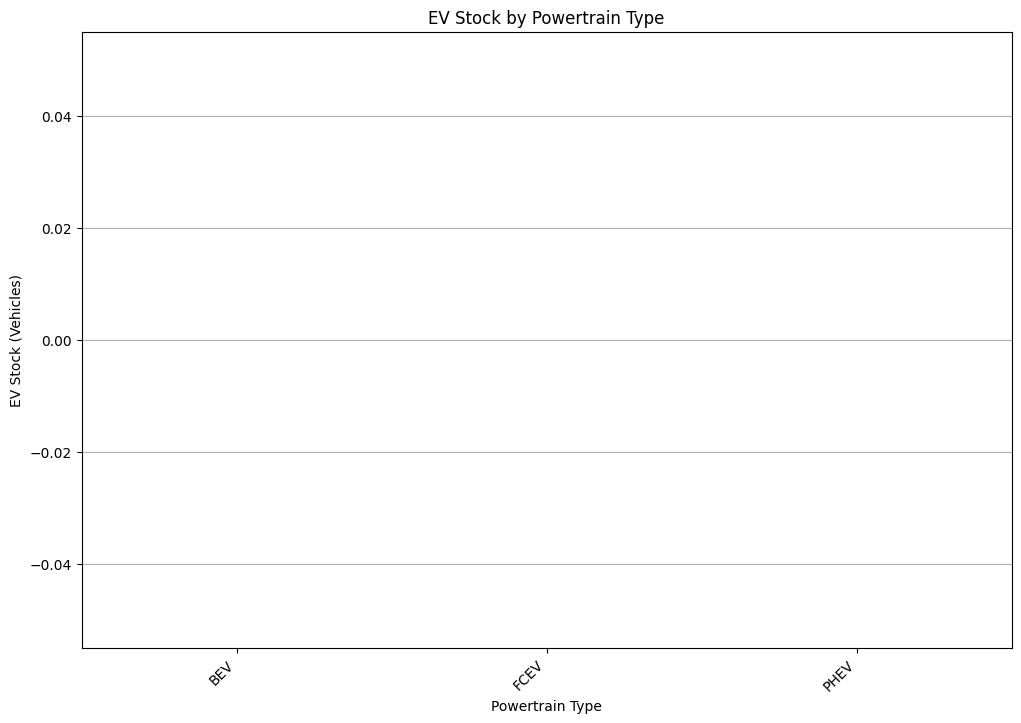

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Filter data for EV stock
ev_stock = df_ev_sales[df_ev_sales['parameter'] == 'EV stock']

# Aggregate EV stock by powertrain type
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum()

# Convert 'value' column to numeric, handling errors
ev_stock_by_powertrain = pd.to_numeric(ev_stock_by_powertrain, errors='coerce')

# Sort the values in descending order
ev_stock_by_powertrain = ev_stock_by_powertrain.sort_values(ascending=False)

#ev_stock_by_powertrain = pd.to_numeric(ev_stock_by_powertrain, errors='coerce')

# Plot EV stock by powertrain
plt.figure(figsize=(12, 8))
ev_stock_by_powertrain.plot(kind='bar', color=plt.get_cmap('Paired').colors)
plt.title('EV Stock by Powertrain Type')
plt.xlabel('Powertrain Type')
plt.ylabel('EV Stock (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

<ipython-input-19-5e003e728c3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_stock_share['value'] = pd.to_numeric(ev_stock_share['value'].str.replace('.', '', regex=False), errors='coerce')


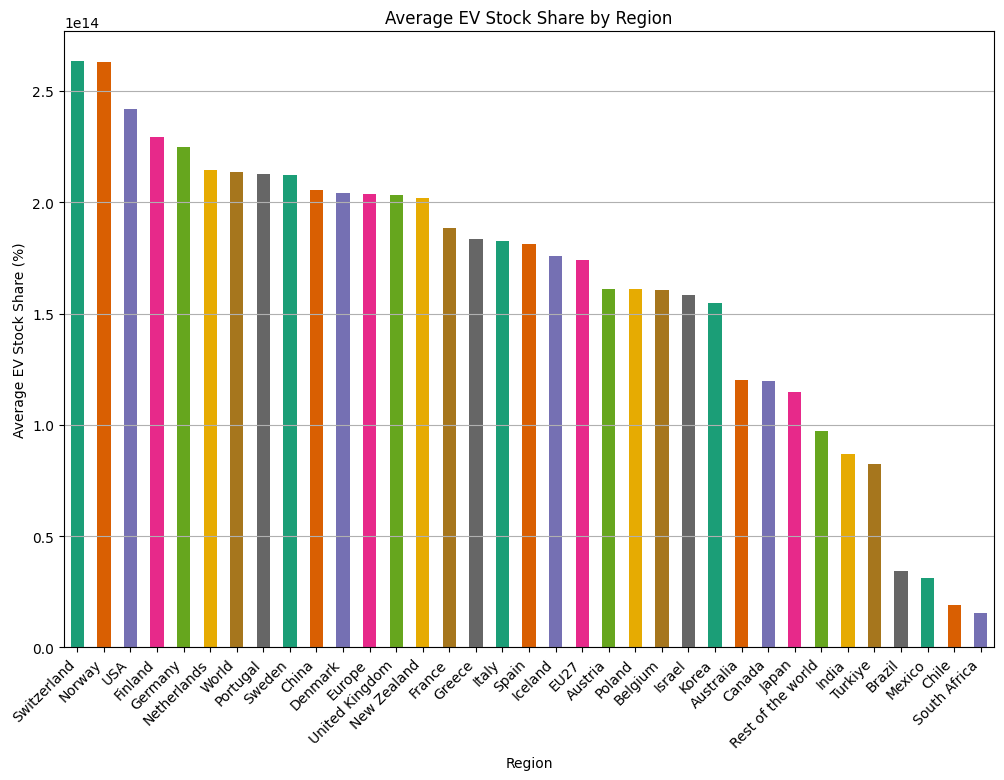

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

ev_stock_share['value'] = pd.to_numeric(ev_stock_share['value'].str.replace('.', '', regex=False), errors='coerce')

# Calculate average EV stock share by region
average_ev_stock_share_by_region = ev_stock_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot average EV stock share by region
plt.figure(figsize=(12, 8))
average_ev_stock_share_by_region.plot(kind='bar', color=plt.get_cmap('Dark2').colors)
plt.title('Average EV Stock Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Stock Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

<ipython-input-29-1df06117fd28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales_share['value'] = pd.to_numeric(ev_sales_share['value'], errors='coerce')


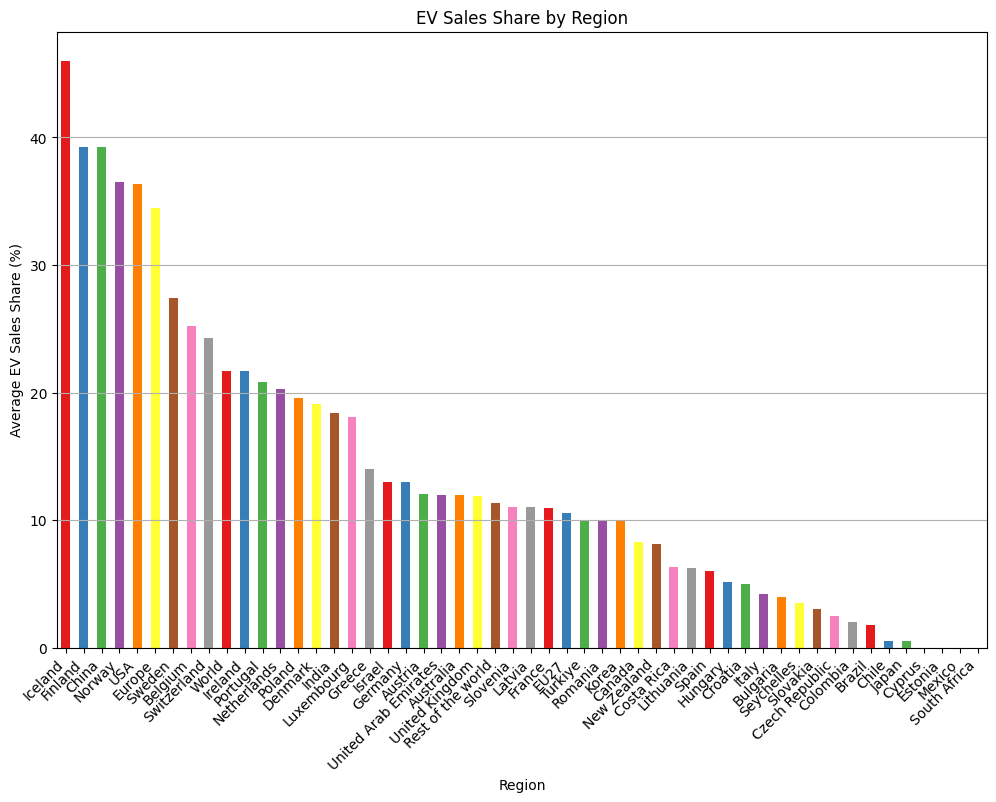

In [ ]:
# Filter data for EV sales share
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Check if the DataFrame is empty
if ev_sales_share.empty:
  print("No data found for 'EV sales share' parameter.")
else:
  # Convert 'value' column to numeric, handling errors
  ev_sales_share['value'] = pd.to_numeric(ev_sales_share['value'], errors='coerce')



# Aggregate EV sales share by region
ev_sales_share_by_region = ev_sales_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Check if there are any numeric values to plot
if ev_sales_share_by_region.empty:
    print("No numeric data to plot.")
else:

# Plot EV sales share by region
  plt.figure(figsize=(12, 8))
  ev_sales_share_by_region.plot(kind='bar', color=plt.get_cmap('Set1').colors)
  plt.title('EV Sales Share by Region')
  plt.xlabel('Region')
  plt.ylabel('Average EV Sales Share (%)')
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y')
  plt.show()

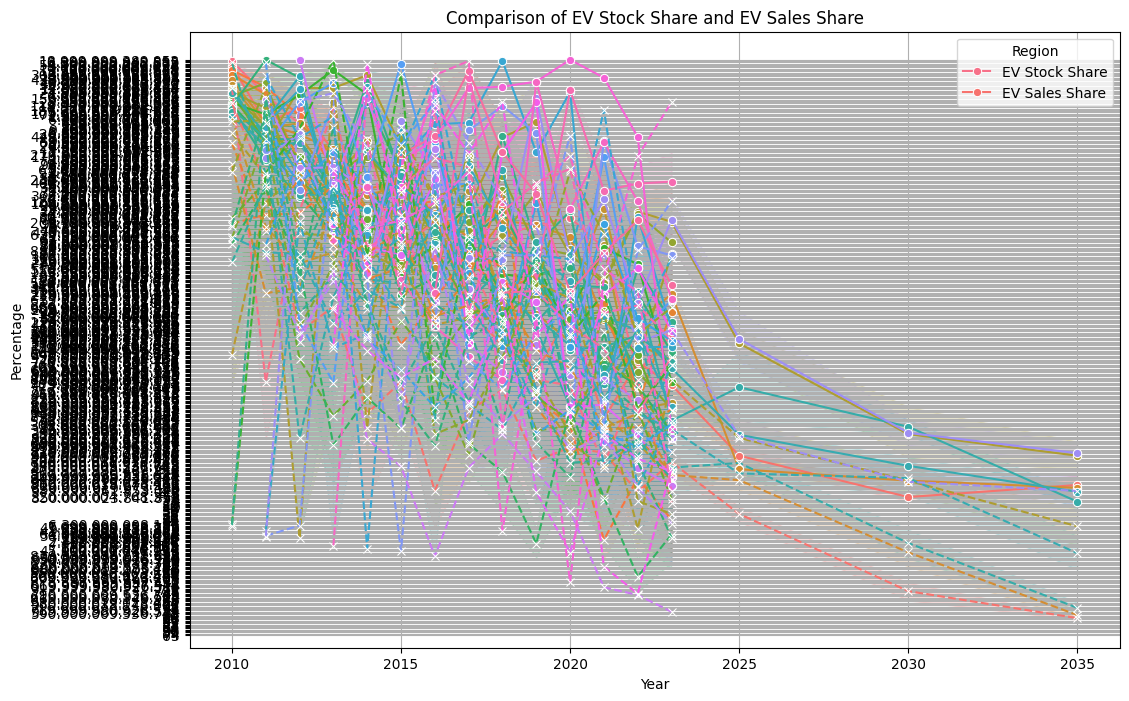

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for both EV stock share and EV sales share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Merge the two dataframes on year and region
comparison_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Plot comparison of EV stock share and EV sales share
plt.figure(figsize=(12, 8))
sns.lineplot(data=comparison_df, x='year', y='value_stock', hue='region', marker='o')
sns.lineplot(data=comparison_df, x='year', y='value_sales', hue='region', marker='x', linestyle='--')
plt.title('Comparison of EV Stock Share and EV Sales Share')
plt.xlabel('Year')
plt.ylabel('Percentage')

handles, labels = plt.gca().get_legend_handles_labels()

labels = ['EV Stock Share', 'EV Sales Share']
plt.legend(handles, labels, title='Region')

plt.grid(True)
plt.show()

<ipython-input-57-1e84bfbdd792>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_stock['value'] = pd.to_numeric(ev_stock['value'], errors='coerce')
<ipython-input-57-1e84bfbdd792>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_sales['value'] = pd.to_numeric(ev_sales['value'], errors='coerce')


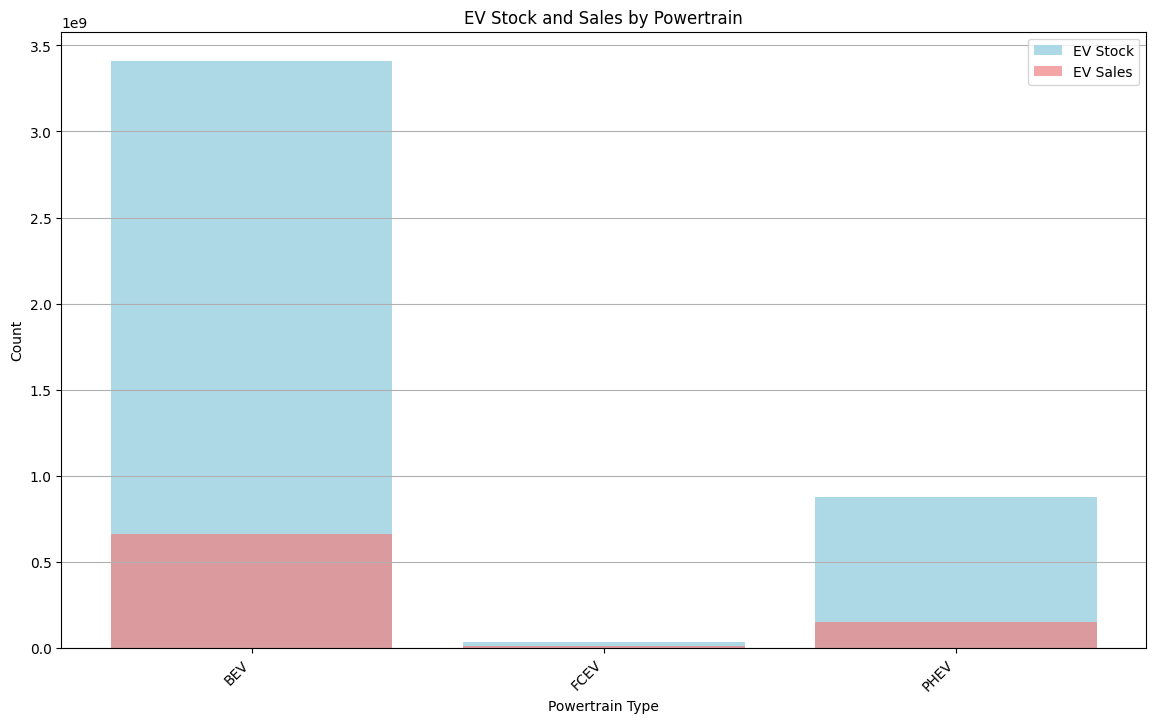

In [ ]:
# Filter data for EV stock and EV sales by powertrain
ev_stock = df_ev_sales[df_ev_sales['parameter'] == 'EV stock']
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Convert 'value' column to numeric before grouping
ev_stock['value'] = pd.to_numeric(ev_stock['value'], errors='coerce')
ev_sales['value'] = pd.to_numeric(ev_sales['value'], errors='coerce')

# Aggregate by powertrain type
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum()
ev_sales_by_powertrain = ev_sales.groupby('powertrain')['value'].sum()

# Plot EV stock and sales by powertrain
plt.figure(figsize=(14, 8))
plt.bar(ev_stock_by_powertrain.index, ev_stock_by_powertrain, color='lightblue', label='EV Stock')
plt.bar(ev_sales_by_powertrain.index, ev_sales_by_powertrain, color='lightcoral', alpha=0.7, label='EV Sales')
plt.title('EV Stock and Sales by Powertrain')
plt.xlabel('Powertrain Type')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


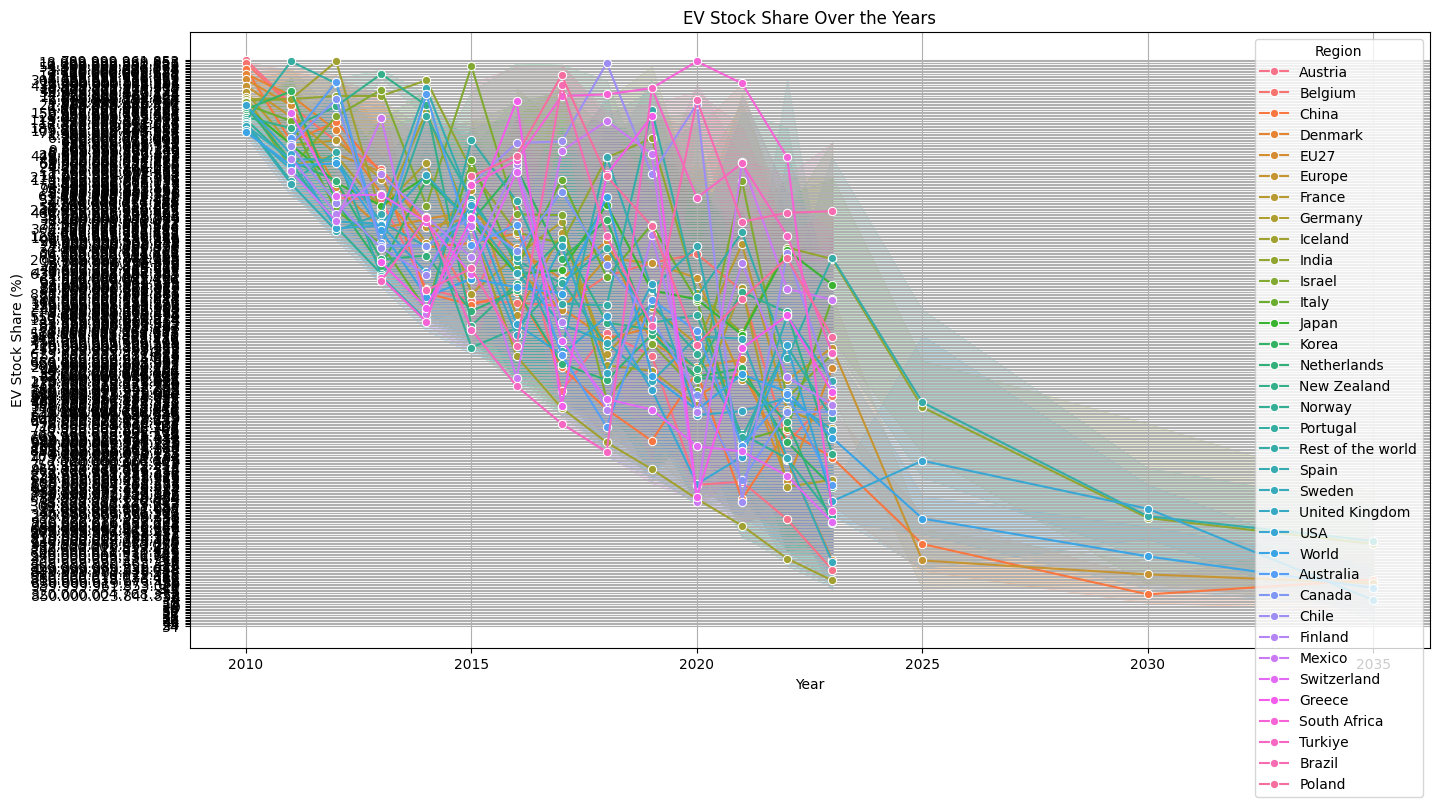

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot EV stock share over the years for different regions
plt.figure(figsize=(16, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

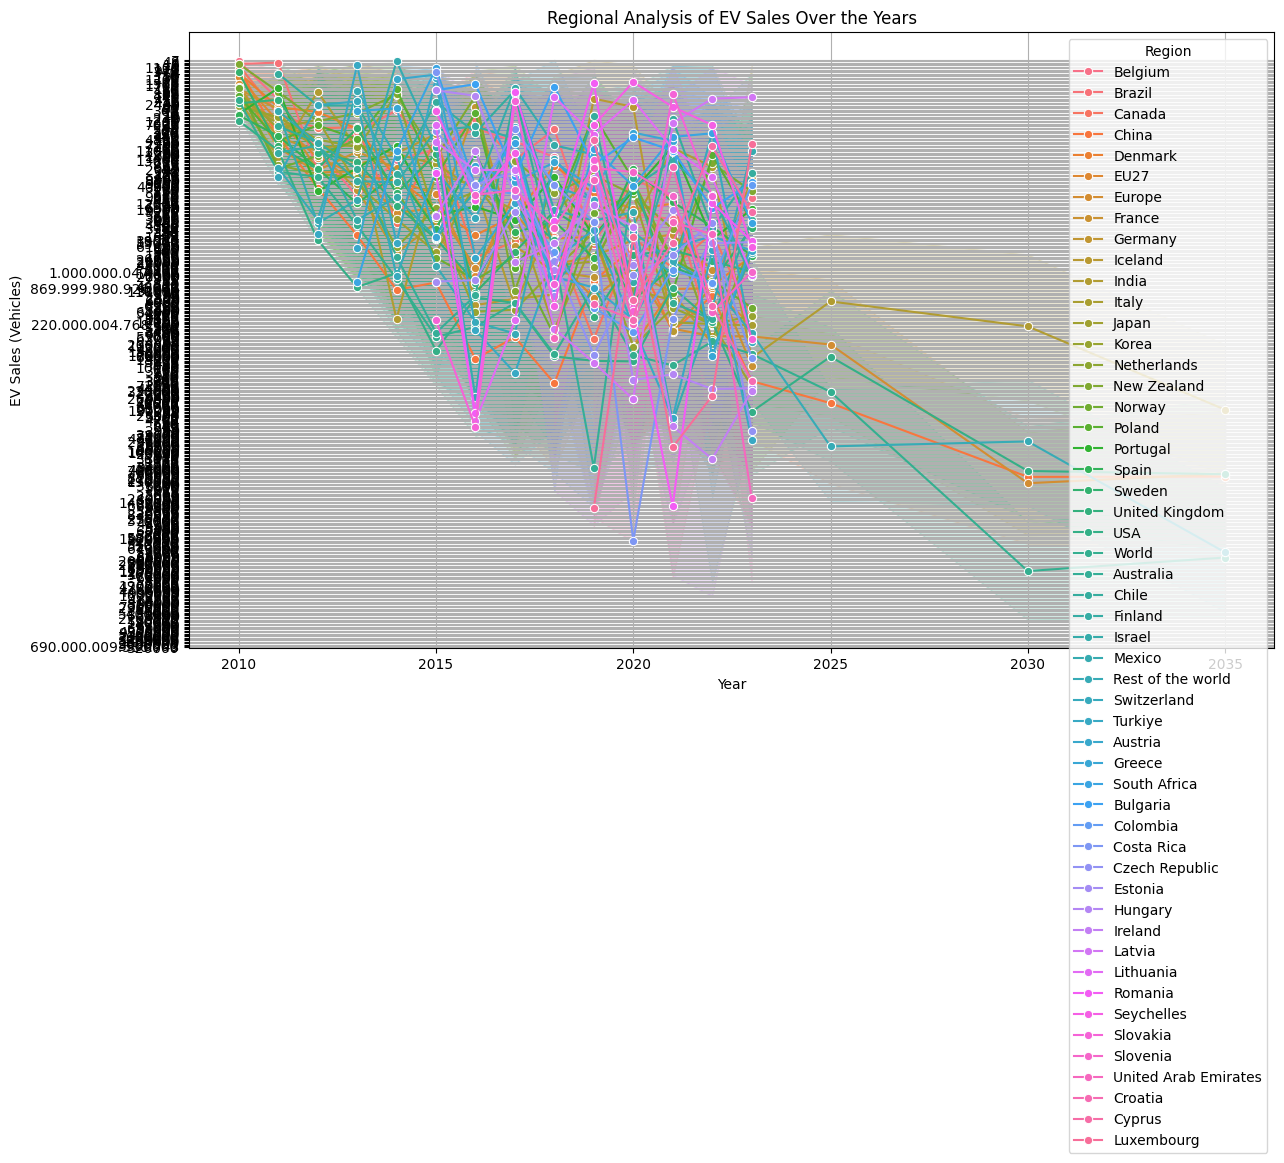

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot EV sales for different regions over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales, x='year', y='value', hue='region', marker='o')
plt.title('Regional Analysis of EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

<ipython-input-40-5edac8f285ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ev_stock_share, x='region', y='value', palette='pastel')


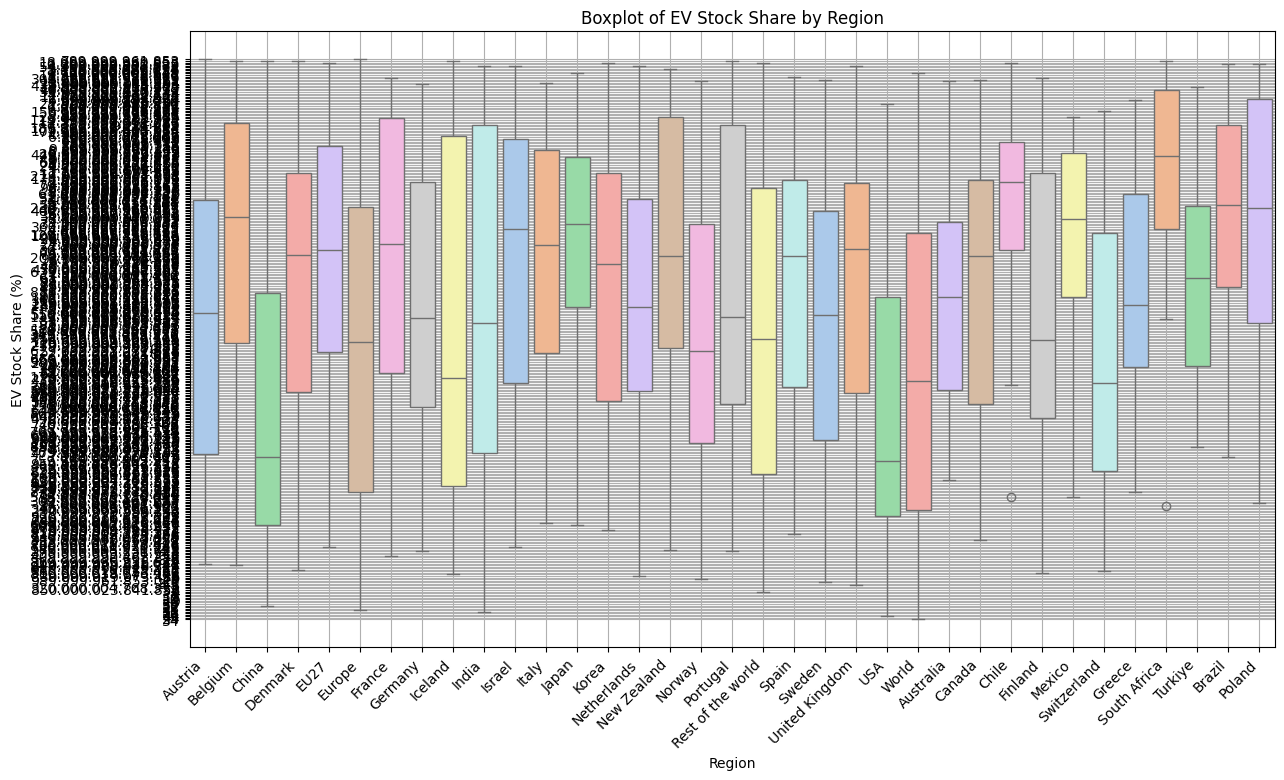

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot boxplot of EV stock share by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=ev_stock_share, x='region', y='value', palette='pastel')
plt.title('Boxplot of EV Stock Share by Region')
plt.xlabel('Region')
plt.ylabel('EV Stock Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

<ipython-input-41-46d293e932db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ev_sales, x='region', y='value', palette='pastel')


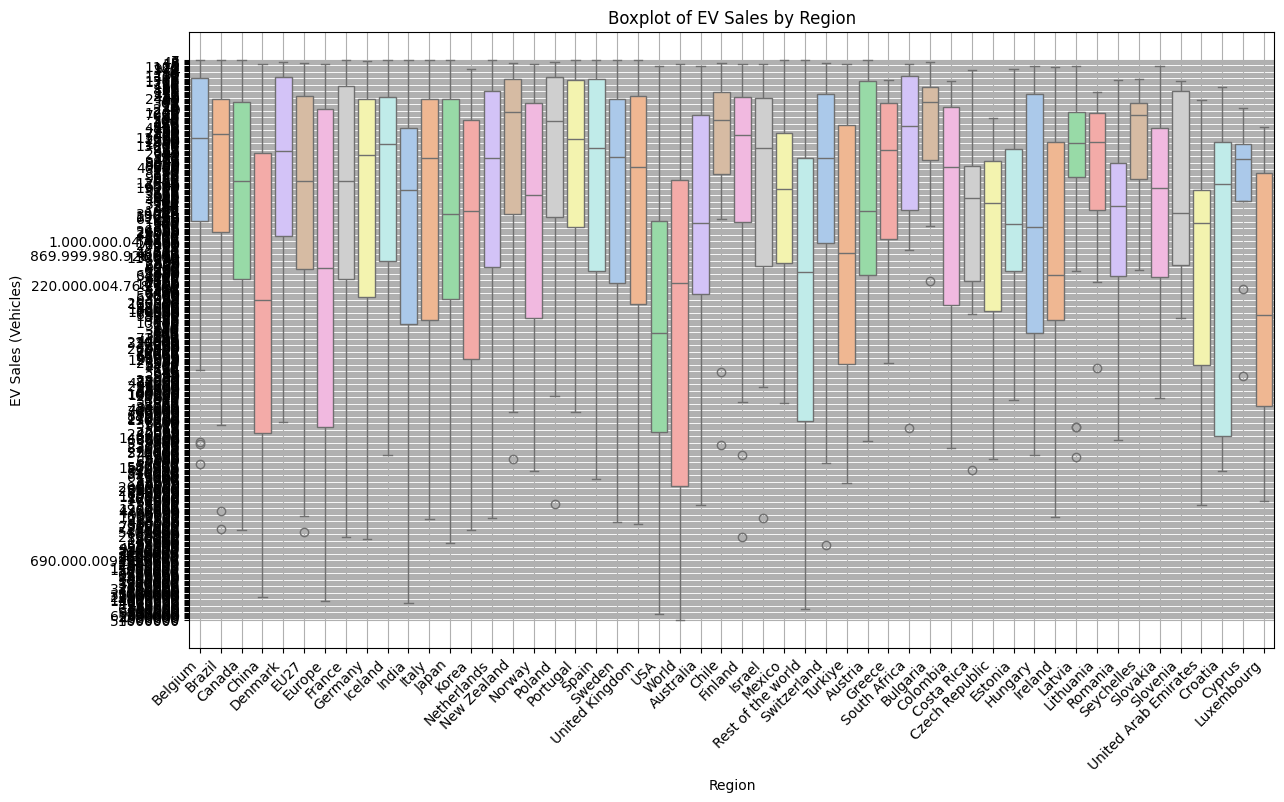

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot boxplot of EV sales by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=ev_sales, x='region', y='value', palette='pastel')
plt.title('Boxplot of EV Sales by Region')
plt.xlabel('Region')
plt.ylabel('EV Sales (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


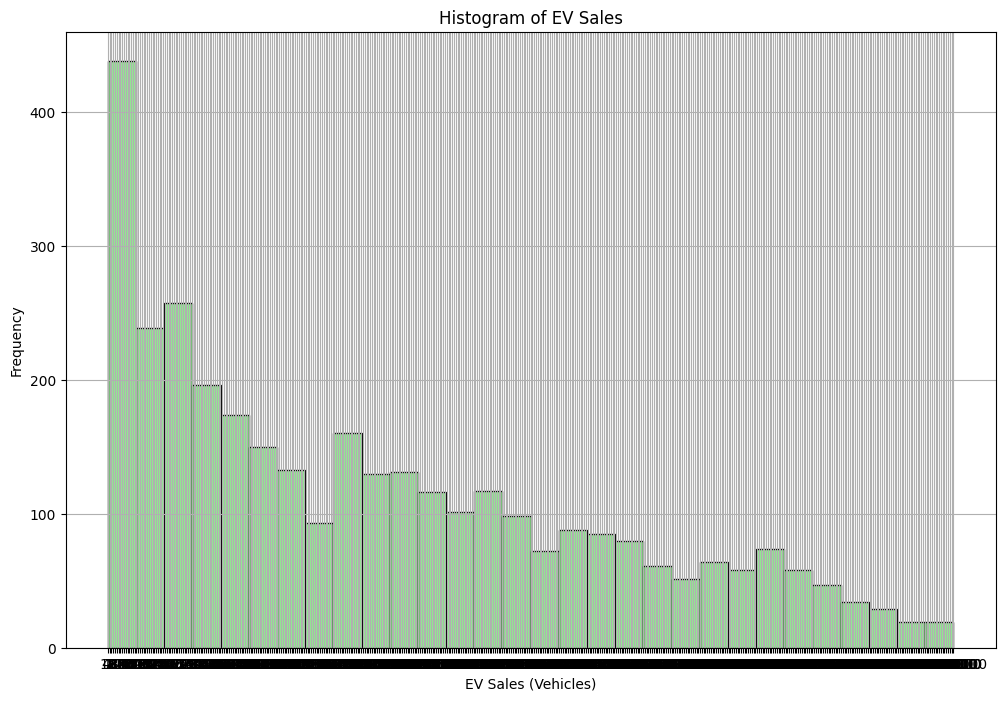

In [ ]:
# Filter data for EV sales
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']

# Plot histogram of EV sales
plt.figure(figsize=(12, 8))
plt.hist(ev_sales['value'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of EV Sales')
plt.xlabel('EV Sales (Vehicles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

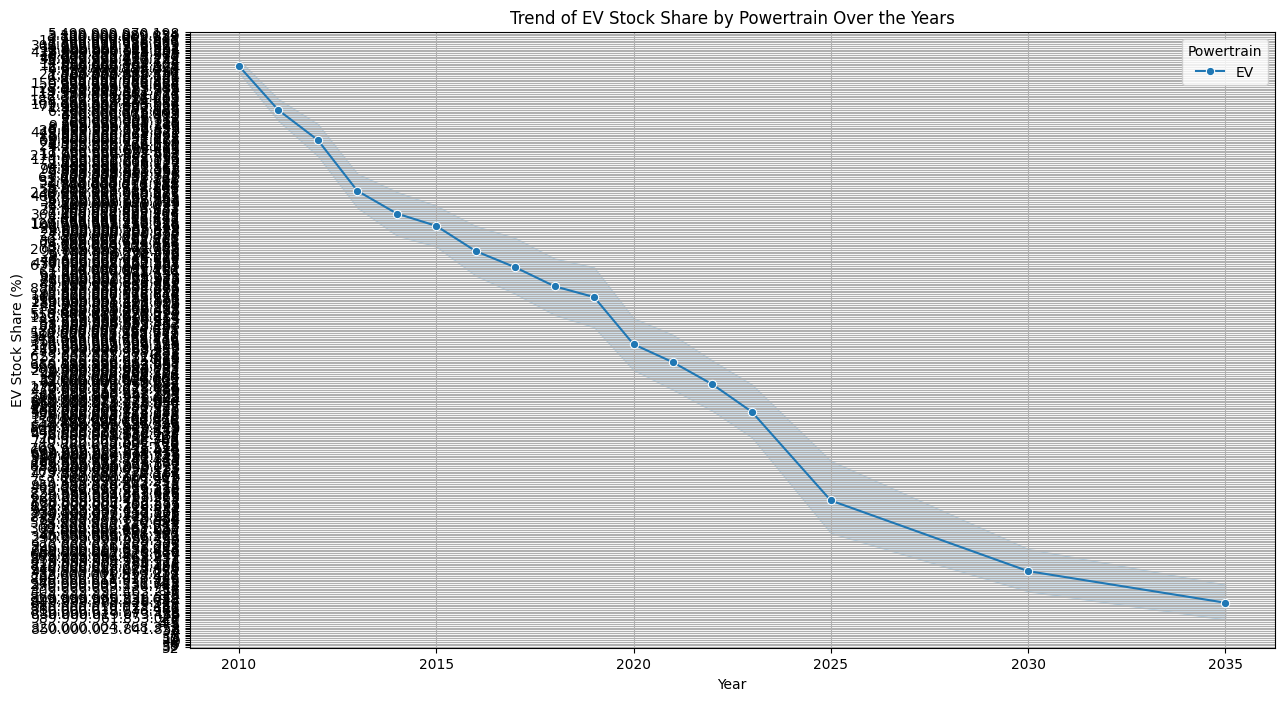

In [ ]:
# Filter data for EV stock share by powertrain
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']

# Plot trend of EV stock share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='powertrain', marker='o')
plt.title('Trend of EV Stock Share by Powertrain Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()

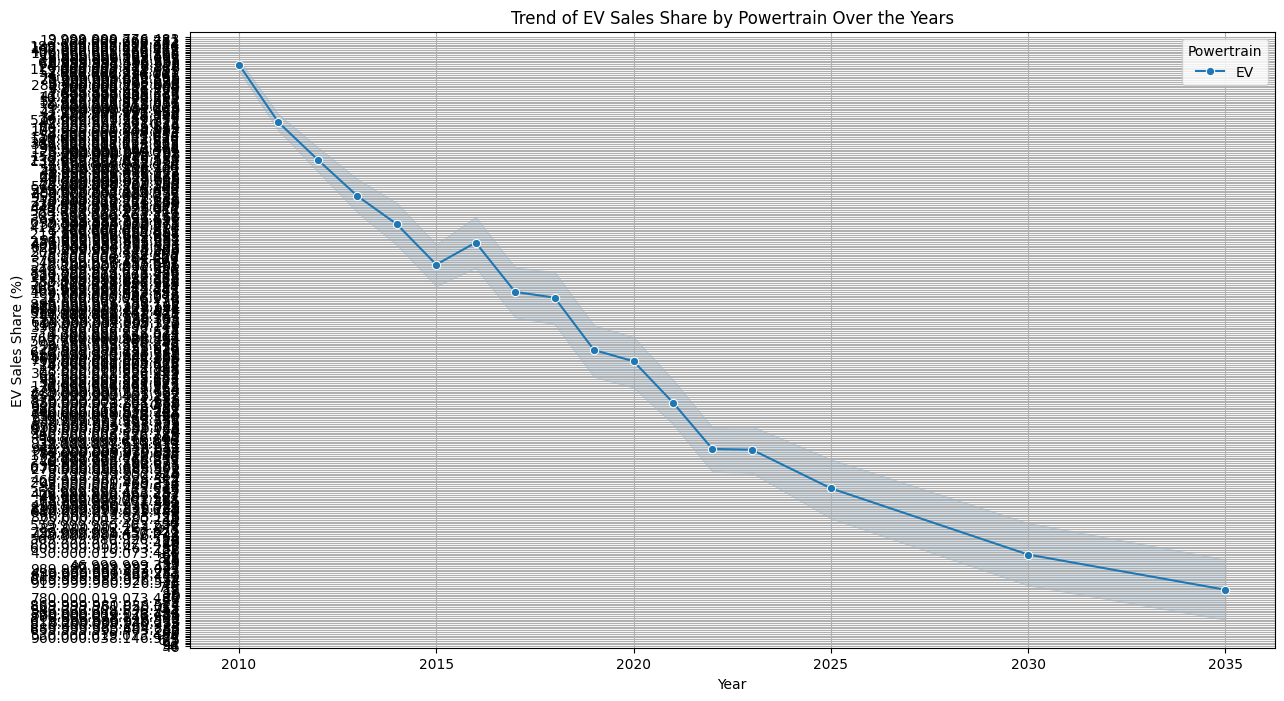

In [ ]:
# Filter data for EV sales share by powertrain
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Plot trend of EV sales share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='powertrain', marker='o')
plt.title('Trend of EV Sales Share by Powertrain Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()


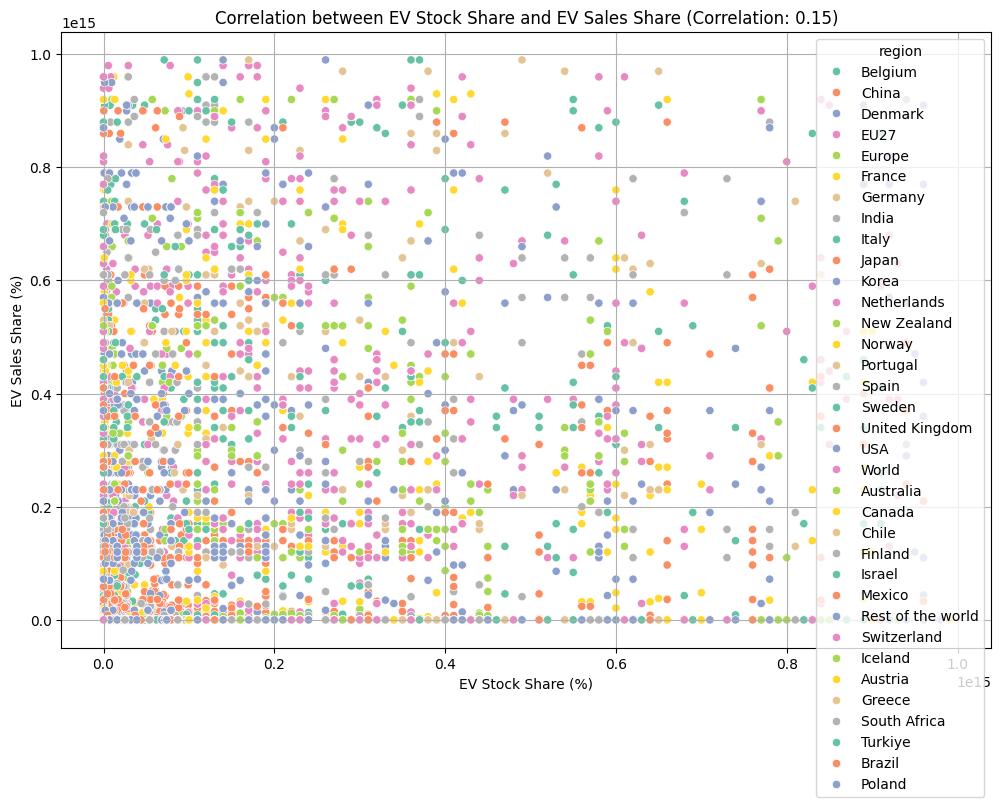

In [ ]:
# Filter data for EV stock share and EV sales share
ev_stock_share = df_ev_sales[df_ev_sales['parameter'] == 'EV stock share']
ev_sales_share = df_ev_sales[df_ev_sales['parameter'] == 'EV sales share']

# Merge the two dataframes on year and region
correlation_df = pd.merge(ev_stock_share, ev_sales_share, on=['year', 'region'], suffixes=('_stock', '_sales'))

# Convert 'value_stock' and 'value_sales' columns to numeric type, handling thousands separators
correlation_df['value_stock'] = correlation_df['value_stock'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
#correlation_df['value_sales'] = correlation_df['value_sales'].str.replace('.', '').str.replace('.', '', regex=False).astype(float)

correlation_df['value_sales'] = correlation_df['value_sales'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)


# Calculate and plot correlation between EV stock share and EV sales share
correlation = correlation_df[['value_stock', 'value_sales']].corr().iloc[0, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=correlation_df, x='value_stock', y='value_sales', hue='region', palette='Set2')
plt.title(f'Correlation between EV Stock Share and EV Sales Share (Correlation: {correlation:.2f})')
plt.xlabel('EV Stock Share (%)')
plt.ylabel('EV Sales Share (%)')
plt.grid(True)
plt.show()
